# Topic: Building your first neural network in Numpy
### Author: Himanshu Rawlani

## Part 1: Code for 2 layer neural network

### 1. Import the required libraries

In [1]:
import numpy as np

### 2. Get the training dataset

In [44]:
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output labels            
y = np.array([[0],
              [0],
              [1],
              [1]])

### 3. Define helper functions

In [45]:
# sigmoid function
def nonlin(x, deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

### 4. Define the training loop

In [48]:
def train_2_layer_nn(input_dataset, output_labels):
    # seed random numbers to make calculation
    # deterministic (just a good practice)
    np.random.seed(1)

    # Number of columns in 'X' is the number of rows in my weight matrix
    output_rows = input_dataset.shape[1]
    # Number of columns in 'y' is the number of columns in my weight matrix
    output_cols = output_labels.shape[1]
    
    # initialize weights randomly with mean 0
    syn0 = 2*np.random.random((output_rows, output_cols)) - 1

    for iter in range(10000):

        # forward propagation
        l0 = X
        l1 = nonlin(np.dot(l0, syn0))

        # how much did we miss?
        l1_error = y - l1

        # multiply how much we missed by the 
        # slope of the sigmoid at the values in l1
        l1_delta = l1_error * nonlin(l1, True)

        # update weights
        syn0 += np.dot(l0.T, l1_delta)

    print("Output After Training:")
    print(l1)

### The error weighted derivative
`l1_delta = l1_error * nonlin(l1, True)`
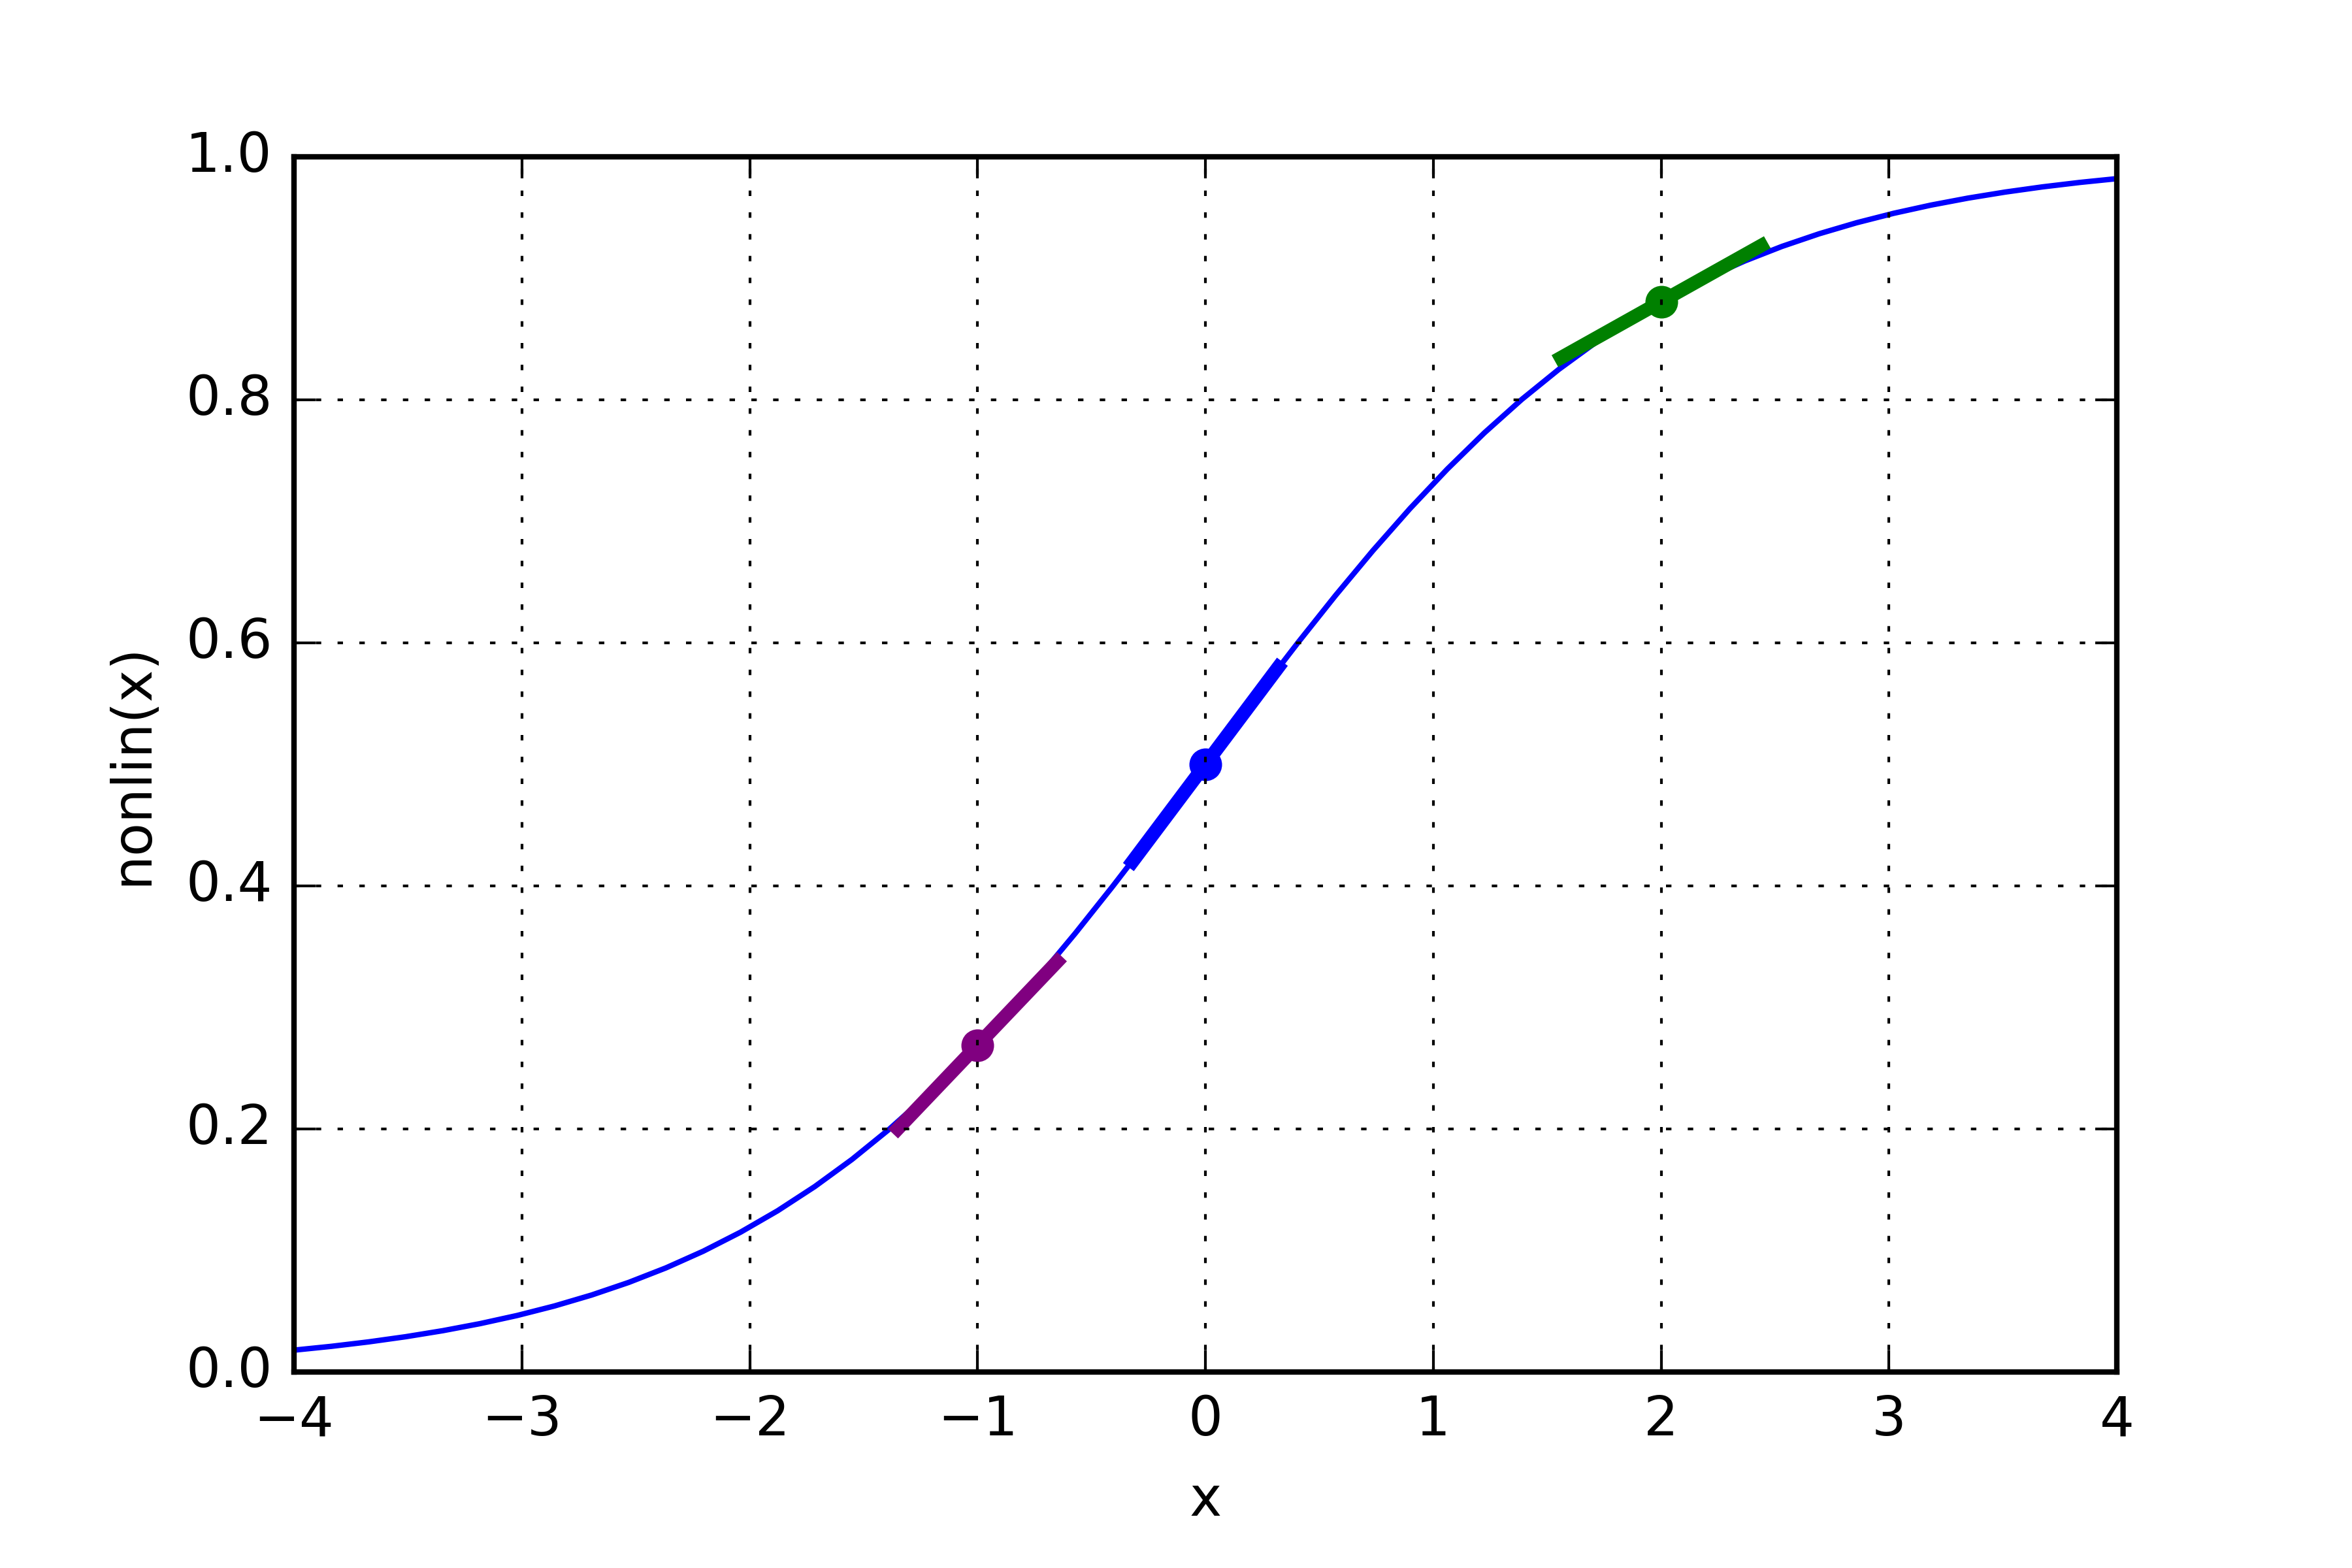

* When we multiply the "slopes" by the error, we are <b>reducing the error of high confidence predictions</b>.
* Thus, in our four training examples below, the weight from the first input to the output would <b>consistently increment or remain unchanged</b>, whereas the other two weights would find themselves <b>both increasing and decreasing across training examples</b> (cancelling out progress). This phenomenon is what causes our network to learn based on correlations between the input and output.

### 5. Perform any input data preprocessing and pass it to the train function

In [49]:
train_2_layer_nn(X, y)

Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


### Let's take a look at a single training example.

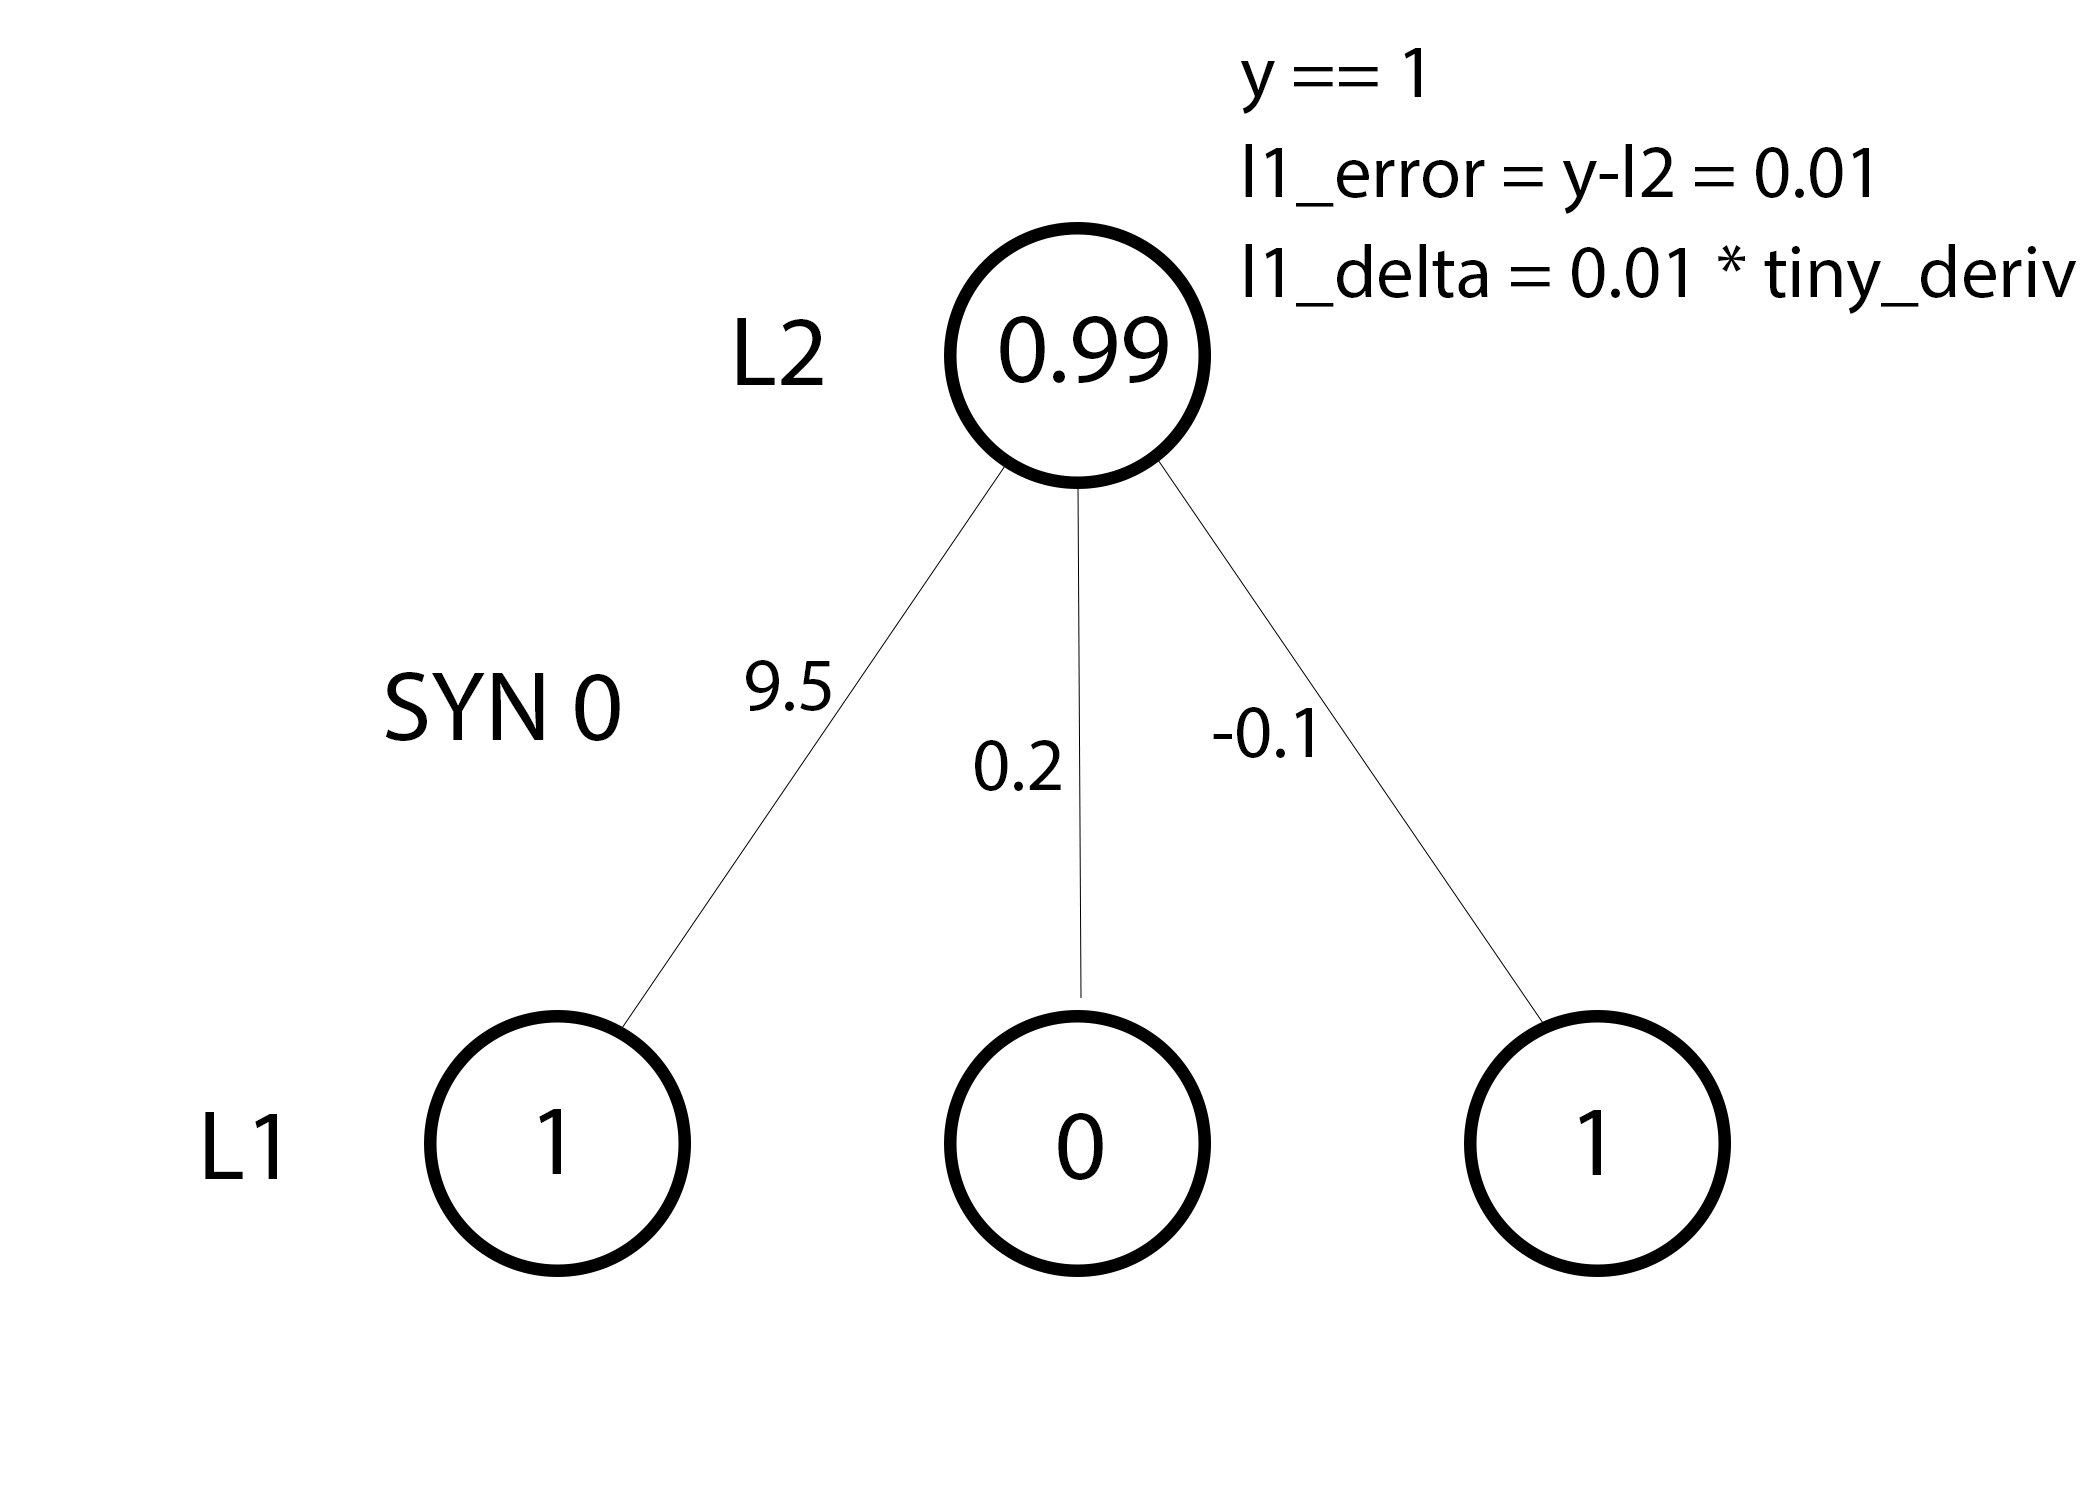

### Let's take a different dataset

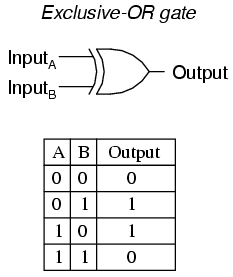

In [50]:
# input dataset
X = np.array([  [0,0],
                [0,1],
                [1,0],
                [1,1] ])
    
# output dataset            
y = np.array([[0,1,1,0]]).T

In [51]:
train_2_layer_nn(X, y)

Output After Training:
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]


### Why didn't we get the desired results?
* A key takeway should be that, in our second dataset, neither columns have any correlation to the output. Each column has a 50% chance of predicting a 1 and a 50% chance of predicting a 0. 
* Our <b>initial training data</b> had a <b>direct one to one mapping between the input and output</b>. This is considered a <b>"nonlinear" pattern</b>.
* In our <b>second dataset</b> there isn't a direct one-to-one relationship between the input and output. Instead, there is a <b>one-to-one relationship between a combination of inputs</b>, namely columns 1 and 2.

Image recognition is also a similar problem. If one had 100 identically sized images of pipes and bicycles, <b>no individual pixel position would directly correlate with the presence of a bicycle or pipe</b>. The pixels might as well be random from a purely statistical point of view. However, <b>certain combinations of pixels are not random</b>, namely the combination that forms the image of a bicycle or a person.

## Part 2: Code for a 3 layer neural network

In order to first combine pixels into something that can then have a one-to-one relationship with the output, we need to add another layer. Our first layer will combine the inputs, and our second layer will then map them to the output using the output of the first layer as input.

In [ ]:
# Input dataset
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Output labels
y = np.array([[0],
              [1],
              [1],
              [0]])

In [54]:
def train_3_layer_nn(input_dataset, output_labels):
    np.random.seed(1)

    # Number of columns in my 'X' is the number of rows in my weight matrix
    l1_rows = input_dataset.shape[1]
    # Choose any number you like 
    l1_cols = 4
    
    l2_rows = l1_cols
    # Number of columns in 'y' is the number of columns in my weight matrix
    l2_cols = output_labels.shape[1]
    
    # randomly initialize our weights with mean 0
    syn0 = 2*np.random.random((l1_rows, l1_cols)) - 1
    syn1 = 2*np.random.random((l2_rows, l2_cols)) - 1

    for j in range(60000):

        # Feed forward through layers 0, 1, and 2
        l0 = X
        l1 = nonlin(np.dot(l0, syn0))
        l2 = nonlin(np.dot(l1, syn1))

        # how much did we miss the target value?
        l2_error = y - l2

        if (j% 10000) == 0:
            print("Error:" + str(np.mean(np.abs(l2_error))))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        l2_delta = l2_error * nonlin(l2, deriv=True)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        l1_error = l2_delta.dot(syn1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        l1_delta = l1_error * nonlin(l1, deriv=True)

        syn1 += l1.T.dot(l2_delta)
        syn0 += l0.T.dot(l1_delta)
    print("\nOutput After Training:")
    print(l2)

Note: The field of adding more layers to model more combinations of relationships such as this is known as "deep learning" because of the increasingly deep layers being modeled.

In [55]:
train_3_layer_nn(X, y)

Error:0.499528964777
Error:0.018951601482
Error:0.0126746372628
Error:0.0100276802422
Error:0.00850592237104
Error:0.00749819542448
Output After Training:
[[ 0.00802491]
 [ 0.99405998]
 [ 0.99281435]
 [ 0.00594029]]


### Taking our previous dataset

In [57]:
# Input dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Output labels
y = np.array([[0],
              [1],
              [1],
              [0]])

In [58]:
train_3_layer_nn(X, y)

Error:0.499528964777
Error:0.018951601482
Error:0.0126746372628
Error:0.0100276802422
Error:0.00850592237104
Error:0.00749819542448
Output After Training:
[[ 0.00802491]
 [ 0.99405998]
 [ 0.99281435]
 [ 0.00594029]]


References: 
* https://iamtrask.github.io/2015/07/12/basic-python-network/
